TEST LOADER FOR PHOIBOS 150 DATA

Typical structure 
/2020/01 January/Day 10/Raw Data/8874

Withing the folder of the scan number there is an info.txt and a scan
In THE AVG FOLDER there is a set of images, averaged over every acquisition cycle
IN THE RAW FOLDER there are single acquisition cycles (difference: in EPFL we added the "save every n cycle function"
this RAW folder also contains a "LUT.txt" file

In [5]:
#test the os package
import os

#get current directory
workingdir=os.getcwd()
#print(workingdir)
#navigate to example data
exampledatapath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159'))
filelist=os.listdir(exampledatapath)
print("example data path= ",exampledatapath)
#this folders contains the AVG folder with the data, an info.txt vector and a scan vector
#filelist

#navigate to the image folder, for EPFL in the \AVG subfolder of the data (note that single scan cycles for partial load are in another subfolder - to be checked with Laurenz)
avgimagepath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159\AVG'))
print("AVG images path= ",avgimagepath)
rawimagelist=os.listdir(avgimagepath)
#alternatively join the paths
#avgimagepath=os.path.join(exampledatapath,'AVG') 


example data path=  C:\Users\Michele\Documents\GitHub\vscode\specsanalyzer\tests\data\dataEPFL\2020\02 February\Day 17\Raw Data\9159
AVG images path=  C:\Users\Michele\Documents\GitHub\vscode\specsanalyzer\tests\data\dataEPFL\2020\02 February\Day 17\Raw Data\9159\AVG


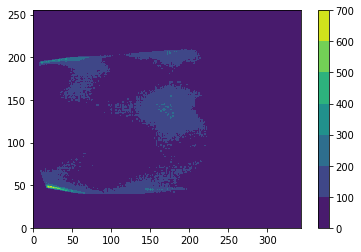

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fname=os.path.join(avgimagepath,rawimagelist[0]) 
numpy_array = np.loadtxt(fname, delimiter="\t")

h = plt.contourf(numpy_array)
plt.colorbar()
#plt.xlim(120,150)
#plt.ylim(150,200)

one of the first operations should be to filter the image to remove the grid via FFT filtering

In [12]:
#load the module and import functions for reading the parameter table from the calib2d file
from importlib import reload
import specsanalyzer.convert
from specsanalyzer.convert import ParametersTable
reload(specsanalyzer.convert)
from specsanalyzer.convert import GetParameters
reload(specsanalyzer.convert)



<module 'specsanalyzer.convert' from 'c:\\users\\michele\\documents\\github\\vscode\\specsanalyzer\\specsanalyzer\\convert.py'>

In [14]:
#GET THE CALIBRATION FILE NAME FROM THE EXAMPLE FOLDER
calib2dfilename=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\phoibosEPFL.txt'))
#GET THE INFO FILE NAME FROM THE EXAMPLE FOLDER, SCAN 9159
#navigate to example data
exampledatapath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159'))
filelist=os.listdir(exampledatapath)
str_match = list(filter(lambda x: 'info.txt' in x, filelist))
infofilename=os.path.join(exampledatapath,str_match[0]) 

calibrationmatrixfull=ParametersTable(calib2dfilename)


In [16]:
calibrationmatrixinterp=GetParameters(infofilename,calib2dfilename)

Our aInner, Das, and RR parameters depending on the LensMode: [[ 1.400e+01  5.102e-01  5.761e-01  4.200e-01  1.000e-01]
 [ 1.400e+01 -2.352e-02  7.230e-02  2.424e-01  1.000e-01]
 [ 1.400e+01  2.391e-02 -6.087e-03 -1.908e-02  1.000e-01]
 [ 1.400e+01 -1.339e-02 -1.605e-03 -5.363e-03  1.000e-01]
 [ 1.500e+01  5.839e-01  6.494e-01  6.104e-01  2.000e-01]
 [ 1.500e+01 -1.569e-02  5.095e-02  1.621e-01  2.000e-01]
 [ 1.500e+01  1.359e-02 -1.416e-02 -4.377e-02  2.000e-01]
 [ 1.500e+01 -8.422e-03 -1.879e-04  2.840e-03  2.000e-01]
 [ 1.500e+01  6.459e-01  7.183e-01  7.196e-01  3.000e-01]
 [ 1.500e+01 -2.780e-02  3.312e-02  1.291e-01  3.000e-01]
 [ 1.500e+01  1.291e-02 -1.964e-02 -5.822e-02  3.000e-01]
 [ 1.500e+01 -8.267e-03  1.243e-03  7.881e-03  3.000e-01]
 [ 1.500e+01  6.674e-01  7.306e-01  7.326e-01  3.500e-01]
 [ 1.500e+01 -2.429e-02  3.752e-02  1.330e-01  3.500e-01]
 [ 1.500e+01  9.284e-03 -2.501e-02 -6.670e-02  3.500e-01]
 [ 1.500e+01 -6.816e-03  2.873e-03  1.045e-02  3.500e-01]
 [ 1.500e+

UnboundLocalError: local variable 'val' referenced before assignment